## Importing the Packages

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
import librosa
import librosa.display

A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the 
amplitude part of the spectral components and observe it.

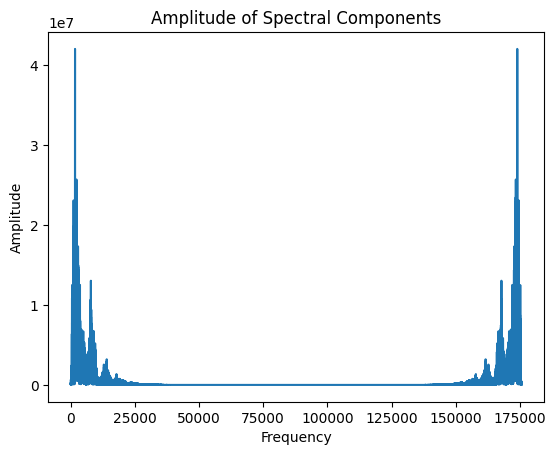

In [45]:
# Loading the speech signal from the WAV file
fs, speech_signal = wavfile.read("Lab_01.wav")

# A1. Transforming the speech signal to its spectral domain using numpy.fft.fft()
spectral_components = np.fft.fft(speech_signal)

# Ploting the amplitude part of the spectral components
plt.plot(np.abs(spectral_components))
plt.title('Amplitude of Spectral Components')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


A2. Use numpy.fft.ifft() to inverse transform the frequency spectrum of the speech signal 
from frequency domain to time domain. Compare the generated time domain signal with the 
original signal.

c:\Users\Devansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Devansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


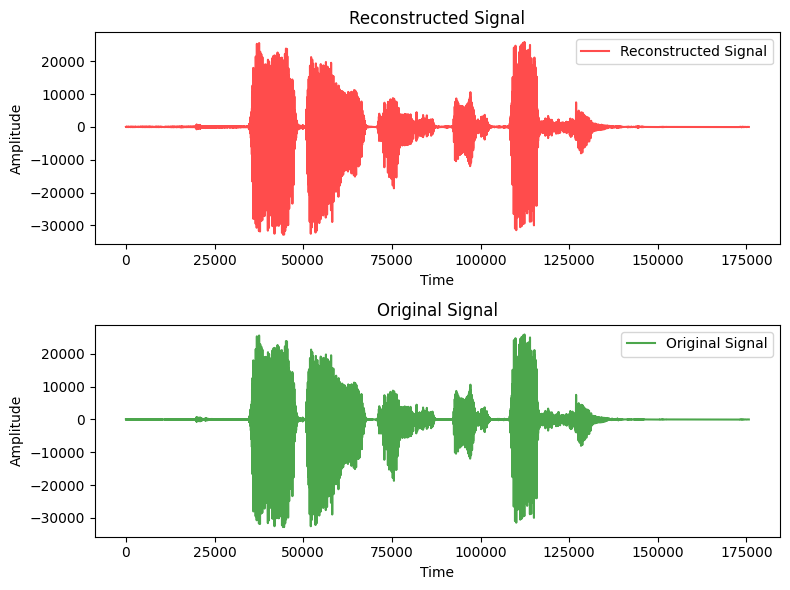

In [46]:
# A2. Inverse transform the frequency spectrum to time domain
reconstructed_signal = np.fft.ifft(spectral_components)

# Creating subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Ploting the reconstructed signal
axes[0].plot(reconstructed_signal, label='Reconstructed Signal', alpha=0.7, color="red")
axes[0].set_title('Reconstructed Signal')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Amplitude')
axes[0].legend()

# Ploting the original signal
axes[1].plot(speech_signal, label='Original Signal', alpha=0.7, color="green")
axes[1].set_title('Original Signal')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Amplitude')
axes[1].legend()

plt.tight_layout()
plt.show()


Zooming in the signals to check for comparison

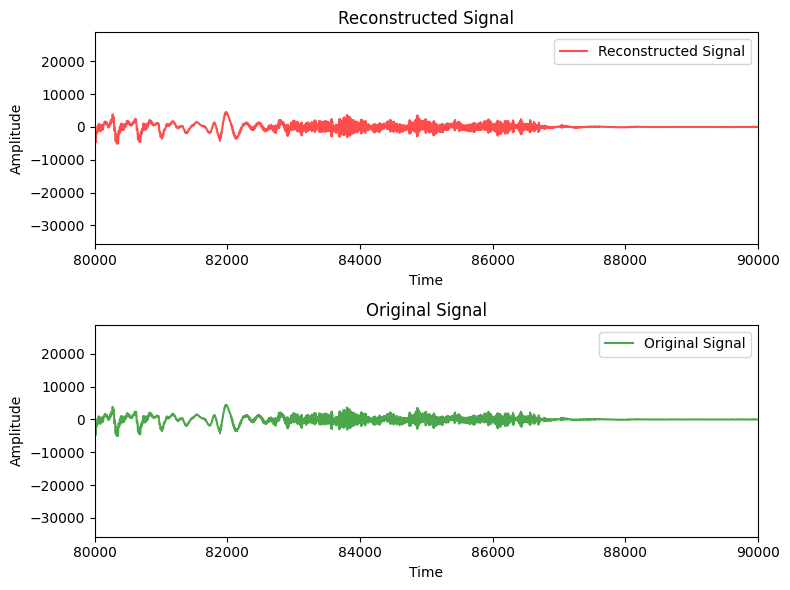

In [47]:

fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Ploting the reconstructed signal
axes[0].plot(reconstructed_signal, label='Reconstructed Signal', alpha=0.7, color="red")
axes[0].set_title('Reconstructed Signal')
axes[0].set_xlabel('Time')
axes[0].set_xlim(80000,90000)
axes[0].set_ylabel('Amplitude')
axes[0].legend()

# Ploting the original signal
axes[1].plot(speech_signal, label='Original Signal', alpha=0.7, color="green")
axes[1].set_title('Original Signal')
axes[1].set_xlabel('Time')
axes[1].set_xlim(80000,90000)
axes[1].set_ylabel('Amplitude')
axes[1].legend()

plt.tight_layout()
plt.show()

A3. Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum 
with the spectrum of the full signal.

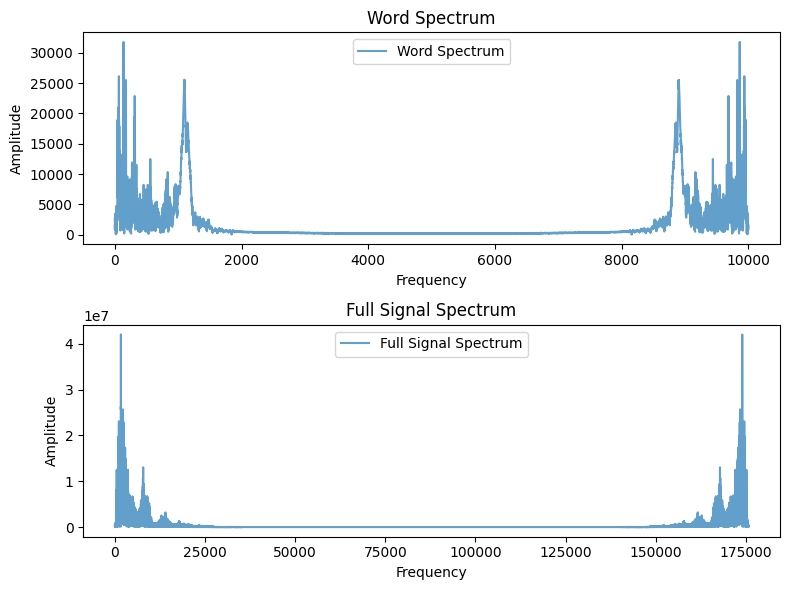

In [48]:
# A3. Spectral analysis of a word present in the recorded speech
start_index = 10000  # Defining start index for the word
end_index = 20000    # Defining end index for the word
word_signal = speech_signal[start_index:end_index]
word_spectrum = np.fft.fft(word_signal)

# Creating subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Ploting the word spectrum
axes[0].plot(np.abs(word_spectrum), label='Word Spectrum', alpha=0.7)
axes[0].set_title('Word Spectrum')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Amplitude')
axes[0].legend()

# Plot the full signal spectrum
axes[1].plot(np.abs(spectral_components), label='Full Signal Spectrum', alpha=0.7)
axes[1].set_title('Full Signal Spectrum')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Amplitude')
axes[1].legend()

plt.tight_layout()
plt.show()


A4. Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the 
spectral components.

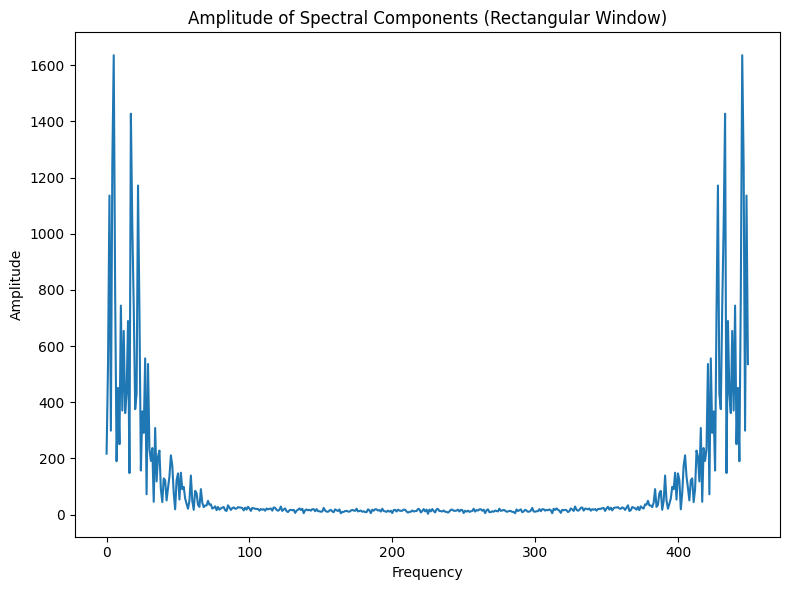

In [54]:
# A4. 
window_size = int(0.02 * 22500)  # 20 milliseconds sampled at the given sampling rate
rectangular_window = speech_signal[:window_size]  # Take the first 20 milliseconds from the original signal
spectrum_rectangular_window = np.fft.fft(rectangular_window)

# Create subplot
plt.figure(figsize=(8, 6))

# Plot the amplitude part of the spectral components
plt.plot(np.abs(spectrum_rectangular_window))
plt.title('Amplitude of Spectral Components (Rectangular Window)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


A5. Break your speech signal into window lengths of 20 mSec intervals. Evaluate the frequency 
components using numpy.fft.rfft(). Stack these frequency components as columns in a 
matrix. Use heatmap plot to display the matrix. You may use librosa.stft() or 
scipy.signal.stft() as well to achieve this.


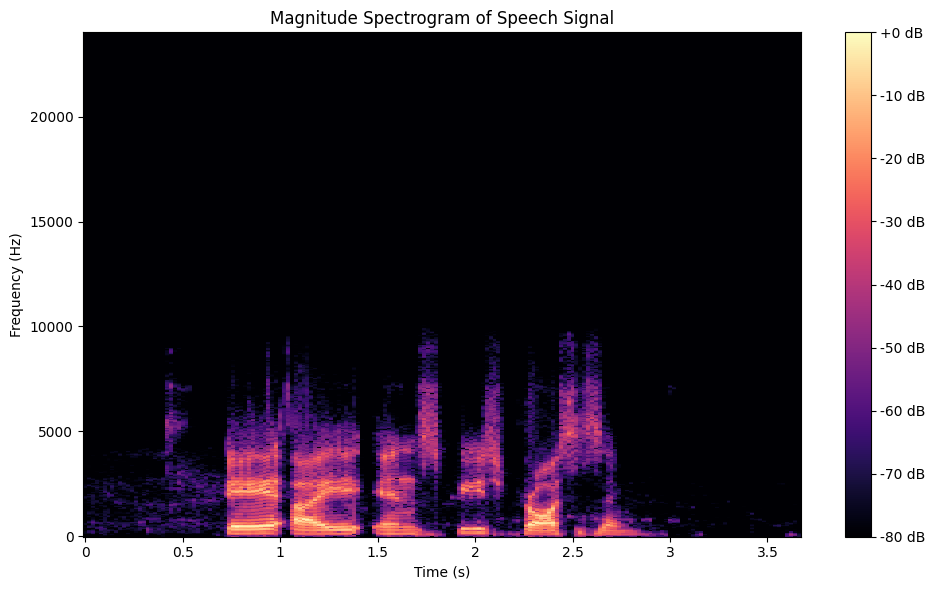

In [52]:

# Convert the speech signal to floating-point format
speech_signal_float = speech_signal.astype(float)

# Define parameters
window_length = int(0.02 * fs)  # 20 milliseconds
hop_length = window_length  # No overlap

# Compute STFT (Short-Time Fourier Transform)
stft_matrix = librosa.stft(speech_signal_float, n_fft=window_length, hop_length=hop_length)

# Convert complex spectrogram to magnitude spectrogram
magnitude_stft = np.abs(stft_matrix)

# Plot the magnitude spectrogram as a heatmap
plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.amplitude_to_db(magnitude_stft, ref=np.max), sr=fs, hop_length=hop_length, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Magnitude Spectrogram of Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()


A6. Use scipy.signal.spectrogram() to plot the spectrogram of the speech signal at the 
same duration. Compare the plots.

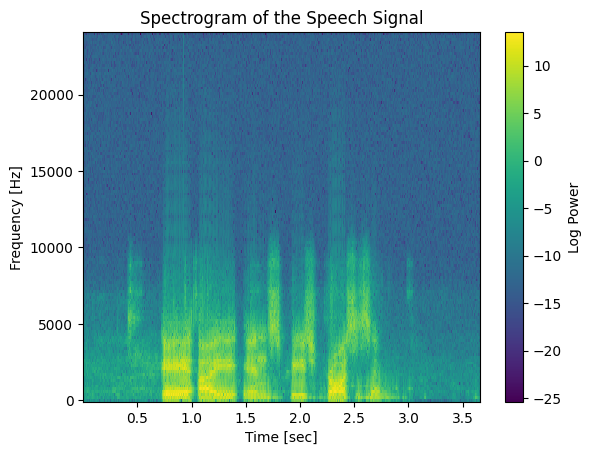

In [53]:
# A6. Plot the spectrogram of the speech signal
frequencies, times, spectrogram_data = spectrogram(speech_signal, fs=fs)

plt.pcolormesh(times, frequencies, np.log(spectrogram_data), shading='auto')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of the Speech Signal')
plt.colorbar(label='Log Power')
plt.show()
